In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
df_game_events = pd.read_csv("/content/drive/MyDrive/codeit/data/game_events.csv")
df_game_factions = pd.read_csv("/content/drive/MyDrive/codeit/data/game_factions.csv")
df_game_locations = pd.read_csv("/content/drive/MyDrive/codeit/data/game_locations.csv")
df_game_options = pd.read_csv("/content/drive/MyDrive/codeit/data/game_options.csv")
df_game_scoring_tiles = pd.read_csv("/content/drive/MyDrive/codeit/data/game_scoring_tiles.csv")

df_games = pd.read_csv("/content/drive/MyDrive/codeit/data/games.csv")

df_ratings_players = pd.read_csv("/content/drive/MyDrive/codeit/data/ratings_players.csv")
df_ratings_factions = pd.read_csv("/content/drive/MyDrive/codeit/data/ratings_factions.csv")
df_ratings_player_factions = pd.read_csv("/content/drive/MyDrive/codeit/data/ratings_player_factions.csv")
df_stats = pd.read_csv("/content/drive/MyDrive/codeit/data/stats.csv")

## 주제 1. 맵에 따른 특징은 무엇이 있을까요?

### 1.1) 데이터 확인 (결측값 확인)

In [ ]:
df_games.head()

,base_map,game,last_update,player_count
0,126fe960806d587c78546b30f1a90853b1ada468,0000000001,2015-07-22 05:15:51,2
1,be8f6ebf549404d015547152d5f2a1906ae8dd90,050615,2015-07-13 09:45:00,4
2,126fe960806d587c78546b30f1a90853b1ada468,0512,2015-07-03 04:17:31,4
3,126fe960806d587c78546b30f1a90853b1ada468,051501,2015-07-16 21:00:54,5
4,95a66999127893f5925a5f591d54f8bcb9a670e6,060303,2015-07-02 05:20:19,4


In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115612 entries, 0 to 115611
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   base_map      115612 non-null  object
 1   game          115611 non-null  object
 2   last_update   115612 non-null  object
 3   player_count  115612 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.5+ MB


In [ ]:
# 결측값 확인
df_games.isnull().sum()

base_map        0
game            1
last_update     0
player_count    0
dtype: int64

In [ ]:
# 결측값 제거
df_games.dropna(axis=0, inplace=True)

### 1.2) 맵에 따른 그룹화

In [ ]:
# base_map으로 그룹화 가능한 수준인지 맵 종류 수 파악
df_games['base_map'].nunique()

9

In [ ]:
# 맵 기준으로 플레이어 수 평균 확인
df_games_GB = df_games.groupby('base_map').mean()

<ipython-input-8-1a30bee0c17e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_games_GB = df_games.groupby('base_map').mean()


In [ ]:
# 핸들링 편하게 하기 위해 index 재설정
df_games_GB.reset_index(drop = False, inplace = True)

In [ ]:
df_games_GB

,base_map,player_count
0,126fe960806d587c78546b30f1a90853b1ada468,3.572767
1,224736500d20520f195970eb0fd4c41df040c08c,3.666667
2,30b6ded823e53670624981abdb2c5b8568a44091,4.000000
3,735b073fd7161268bb2796c1275abda92acd8b1a,4.000000
4,95a66999127893f5925a5f591d54f8bcb9a670e6,3.543939
5,b109f78907d2cbd5699ced16572be46043558e41,4.000000
6,be8f6ebf549404d015547152d5f2a1906ae8dd90,3.451063
7,c07f36f9e050992d2daf6d44af2bc51dca719c46,4.000000
8,fdb13a13cd48b7a3c3525f27e4628ff6905aa5b1,3.504959


- 여기에서 4.000000이 이상하다고 알아채는 것이 중요
- 데이터를 탐색하면서 이상하게 생각되는 데이터는 반드시 그냥 넘어가지 말아야하기 때문
- 그래서 "4.000000가 나온 맵이 한 번 플레이 된 것이 아닐까? 라는 생각"으로 연장되기를 의도

In [ ]:
# 맵 별로 플레이 된 횟수를 파악해보기
df_games_GB = pd.DataFrame(df_games.groupby('base_map').count())

In [ ]:
df_games_GB.reset_index(drop = False, inplace = True)

In [ ]:
df_games_GB

,base_map,game,last_update,player_count
0,126fe960806d587c78546b30f1a90853b1ada468,77157,77157,77157
1,224736500d20520f195970eb0fd4c41df040c08c,3,3,3
2,30b6ded823e53670624981abdb2c5b8568a44091,1,1,1
3,735b073fd7161268bb2796c1275abda92acd8b1a,2,2,2
4,95a66999127893f5925a5f591d54f8bcb9a670e6,21052,21052,21052
5,b109f78907d2cbd5699ced16572be46043558e41,1,1,1
6,be8f6ebf549404d015547152d5f2a1906ae8dd90,16184,16184,16184
7,c07f36f9e050992d2daf6d44af2bc51dca719c46,1,1,1
8,fdb13a13cd48b7a3c3525f27e4628ff6905aa5b1,1210,1210,1210


- 플레이 횟수가 압도적으로 적은 5개의 맵을 확인하고, 이 맵을 제외하고 확인.

In [ ]:
# 5개 맵 제외
df_games_GB_new = df_games.drop(df_games[df_games['base_map'] == "224736500d20520f195970eb0fd4c41df040c08c"].index)
df_games_GB_new = df_games_GB_new.drop(df_games_GB_new[df_games_GB_new['base_map'] == "30b6ded823e53670624981abdb2c5b8568a44091"].index)
df_games_GB_new = df_games_GB_new.drop(df_games_GB_new[df_games_GB_new['base_map'] == "735b073fd7161268bb2796c1275abda92acd8b1a"].index)
df_games_GB_new = df_games_GB_new.drop(df_games_GB_new[df_games_GB_new['base_map'] == "b109f78907d2cbd5699ced16572be46043558e41"].index)
df_games_GB_new = df_games_GB_new.drop(df_games_GB_new[df_games_GB_new['base_map'] == "c07f36f9e050992d2daf6d44af2bc51dca719c46"].index)

In [ ]:
df_games_GB_new

,base_map,game,last_update,player_count
0,126fe960806d587c78546b30f1a90853b1ada468,0000000001,2015-07-22 05:15:51,2
1,be8f6ebf549404d015547152d5f2a1906ae8dd90,050615,2015-07-13 09:45:00,4
2,126fe960806d587c78546b30f1a90853b1ada468,0512,2015-07-03 04:17:31,4
3,126fe960806d587c78546b30f1a90853b1ada468,051501,2015-07-16 21:00:54,5
4,95a66999127893f5925a5f591d54f8bcb9a670e6,060303,2015-07-02 05:20:19,4
...,...,...,...,...
115607,126fe960806d587c78546b30f1a90853b1ada468,Youreacrookcaptianhook,2014-09-04 05:04:45,3
115608,126fe960806d587c78546b30f1a90853b1ada468,YourMomIsAChaosMagician,2014-09-02 00:23:43,4
115609,126fe960806d587c78546b30f1a90853b1ada468,ytuwertqwtr,2014-09-28 18:12:35,2
115610,126fe960806d587c78546b30f1a90853b1ada468,yuertyqert,2014-09-27 19:01:17,2


In [ ]:
# 맵 별 평균 플레이어 수
df_games_GB = pd.DataFrame(df_games_GB_new.groupby('base_map').mean())
df_games_GB.reset_index(drop = False, inplace = True)
df_games_GB

<ipython-input-16-04a4bb9d5009>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_games_GB = pd.DataFrame(df_games_GB_new.groupby('base_map').mean())


,base_map,player_count
0,126fe960806d587c78546b30f1a90853b1ada468,3.572767
1,95a66999127893f5925a5f591d54f8bcb9a670e6,3.543939
2,be8f6ebf549404d015547152d5f2a1906ae8dd90,3.451063
3,fdb13a13cd48b7a3c3525f27e4628ff6905aa5b1,3.504959


<Axes: xlabel='base_map'>

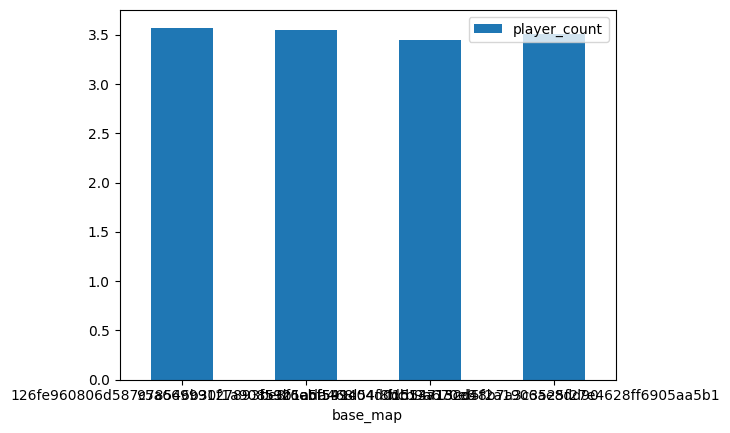

In [ ]:
df_games_GB.plot.bar(x='base_map', y='player_count', rot=0)

- 맵 별 평균 플레이어 수는 큰 차이가 없음

In [ ]:
# 맵 별 카운트
df_games_GB = pd.DataFrame(df_games_GB_new.groupby('base_map').count())
df_games_GB.reset_index(drop = False, inplace = True)
df_games_GB

,base_map,game,last_update,player_count
0,126fe960806d587c78546b30f1a90853b1ada468,77157,77157,77157
1,95a66999127893f5925a5f591d54f8bcb9a670e6,21052,21052,21052
2,be8f6ebf549404d015547152d5f2a1906ae8dd90,16184,16184,16184
3,fdb13a13cd48b7a3c3525f27e4628ff6905aa5b1,1210,1210,1210


([<matplotlib.patches.Wedge at 0x7ac9d4e58370>,
 [Text(-0.5522851634339317, 0.9513049449313061, '126fe960806d587c78546b30f1a90853b1ada468'),
  Text(0.05860777605111515, -1.0984375852028838, '95a66999127893f5925a5f591d54f8bcb9a670e6'),
  Text(0.9623847649046622, -0.5327434319439314, 'be8f6ebf549404d015547152d5f2a1906ae8dd90'),
  Text(1.0994053536830557, -0.03616446174126617, 'fdb13a13cd48b7a3c3525f27e4628ff6905aa5b1')],
 [Text(-0.3012464527821445, 0.518893606326167, '66.7%'),
  Text(0.0319678778460628, -0.5991477737470274, '18.2%'),
  Text(0.5249371444934521, -0.2905873265148716, '14.0%'),
  Text(0.5996756474634848, -0.019726070040690633, '1.0%')])

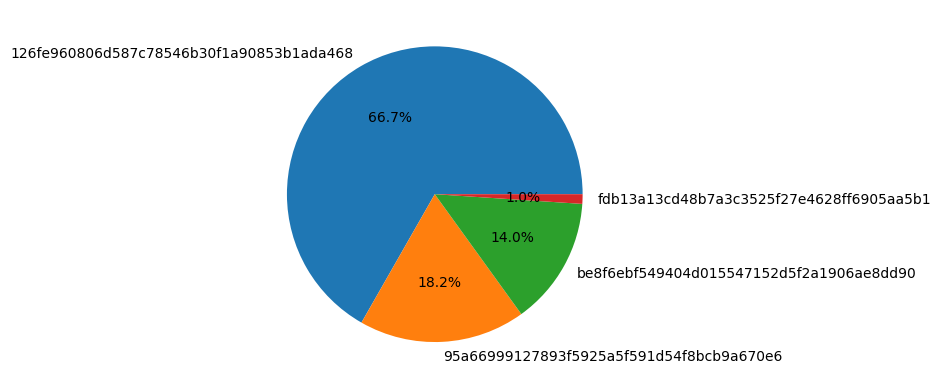

In [ ]:
plt.pie(df_games_GB['player_count'], labels = df_games_GB['base_map'], autopct='%1.1f%%')

- 맵 별로 플레이 수 시각화

#### 맵 별로 평균 플레이어 수와 플레이 수를 시각화해보면서 기본적인 데이터프레임 활용 능력을 활용해볼 수 있음.

**굵은 텍스트**## 주제 2. 게임 라운드가 진행됨에 따라서 무엇이 다를까요?

### 2.1) 데이터 확인 (결측값 확인)

In [ ]:
df_game_events.head()

,event,faction,game,num,round,turn
0,upgrade:SH,halflings,0000000001,1,2,1
1,order:2,halflings,0000000001,1,6,1
2,order:2,halflings,0000000001,1,2,1
3,order:1,halflings,0000000001,1,1,1
4,order:1,halflings,0000000001,1,5,1


In [ ]:
df_game_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73419074 entries, 0 to 73419073
Data columns (total 6 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   event    object
 1   faction  object
 2   game     object
 3   num      int64 
 4   round    int64 
 5   turn     int64 
dtypes: int64(3), object(3)
memory usage: 3.3+ GB


In [ ]:
# 결측값 확인
df_game_events.isnull().sum()

event        0
faction      0
game       704
num          0
round        0
turn         0
dtype: int64

In [ ]:
# 결측값 제거
df_game_events.dropna(axis=0, inplace=True)

In [ ]:
df_game_events

,event,faction,game,num,round,turn
0,upgrade:SH,halflings,0000000001,1,2,1
1,order:2,halflings,0000000001,1,6,1
2,order:2,halflings,0000000001,1,2,1
3,order:1,halflings,0000000001,1,1,1
4,order:1,halflings,0000000001,1,5,1
...,...,...,...,...,...,...
73419069,burn,darklings,ZeicheMasZeuchnis,4,1,1
73419070,burn,darklings,ZeicheMasZeuchnis,3,5,2
73419071,favor:FAV10,darklings,ZeicheMasZeuchnis,1,3,3
73419072,town:TW3,darklings,ZeicheMasZeuchnis,1,6,2


In [ ]:
df_game_events['round'].unique()

array([2, 6, 1, 5, 3, 4, 0])

### 2.2) 라운드 별로 데이터 새로 저장
- 용량 큰 데이터 핸들링 필요

In [ ]:
'''
# round 별 데이터 구분
## round 0
df_game_events_0 = df_game_events[df_game_events['round'] == 0]
'''

"\n# round 별 데이터 구분\n## round 0\ndf_game_events_0 = df_game_events[df_game_events['round'] == 0]\n"

In [ ]:
'''
df_game_events_0
'''

'\ndf_game_events_0\n'

In [ ]:
'''
df_game_events_0.to_csv("/content/drive/MyDrive/codeit/data/df_game_events_0.csv")
'''

'\ndf_game_events_0.to_csv("/content/drive/MyDrive/codeit/data/df_game_events_0.csv")\n'

In [ ]:
'''
## round 1
df_game_events_1 = df_game_events[df_game_events['round'] == 1]
## round 2
df_game_events_2 = df_game_events[df_game_events['round'] == 2]
'''

"\n## round 1\ndf_game_events_1 = df_game_events[df_game_events['round'] == 1]\n## round 2\ndf_game_events_2 = df_game_events[df_game_events['round'] == 2]\n"

In [ ]:
"""df_game_events_1.to_csv("/content/drive/MyDrive/codeit/data/df_game_events_1.csv")
df_game_events_2.to_csv("/content/drive/MyDrive/codeit/data/df_game_events_2.csv")"""

'df_game_events_1.to_csv("/content/drive/MyDrive/codeit/data/df_game_events_1.csv")\ndf_game_events_2.to_csv("/content/drive/MyDrive/codeit/data/df_game_events_2.csv")'

In [ ]:
"""## round 3
df_game_events_3 = df_game_events[df_game_events['round'] == 3]
## round 4
df_game_events_4 = df_game_events[df_game_events['round'] == 4]"""

"## round 3\ndf_game_events_3 = df_game_events[df_game_events['round'] == 3]\n## round 4\ndf_game_events_4 = df_game_events[df_game_events['round'] == 4]"

In [ ]:
"""df_game_events_3.to_csv("/content/drive/MyDrive/codeit/data/df_game_events_3.csv")
df_game_events_4.to_csv("/content/drive/MyDrive/codeit/data/df_game_events_4.csv")"""

'df_game_events_3.to_csv("/content/drive/MyDrive/codeit/data/df_game_events_3.csv")\ndf_game_events_4.to_csv("/content/drive/MyDrive/codeit/data/df_game_events_4.csv")'

In [ ]:
"""## round 5
df_game_events_5 = df_game_events[df_game_events['round'] == 5]
## round 6
df_game_events_6 = df_game_events[df_game_events['round'] == 6]"""

"## round 5\ndf_game_events_5 = df_game_events[df_game_events['round'] == 5]\n## round 6\ndf_game_events_6 = df_game_events[df_game_events['round'] == 6]"

In [ ]:
"""df_game_events_5.to_csv("/content/drive/MyDrive/codeit/data/df_game_events_5.csv")
df_game_events_6.to_csv("/content/drive/MyDrive/codeit/data/df_game_events_6.csv")"""

'df_game_events_5.to_csv("/content/drive/MyDrive/codeit/data/df_game_events_5.csv")\ndf_game_events_6.to_csv("/content/drive/MyDrive/codeit/data/df_game_events_6.csv")'

In [ ]:
df_game_events_0 = pd.read_csv("/content/drive/MyDrive/codeit/data/df_game_events_0.csv")
df_game_events_1 = pd.read_csv("/content/drive/MyDrive/codeit/data/df_game_events_1.csv")
df_game_events_2 = pd.read_csv("/content/drive/MyDrive/codeit/data/df_game_events_2.csv")
df_game_events_3 = pd.read_csv("/content/drive/MyDrive/codeit/data/df_game_events_3.csv")
df_game_events_4 = pd.read_csv("/content/drive/MyDrive/codeit/data/df_game_events_4.csv")
df_game_events_5 = pd.read_csv("/content/drive/MyDrive/codeit/data/df_game_events_5.csv")
df_game_events_6 = pd.read_csv("/content/drive/MyDrive/codeit/data/df_game_events_6.csv")

### 2.3) 각 라운드별 시각화 진행

#### 2.3.1) 0 라운드

In [ ]:
# 1. event 별로 그룹화해서 count
# 2.
df_game_events_0

,Unnamed: 0,event,faction,game,num,round,turn
0,30,pass:BON5,halflings,0000000001,1,0,0
1,49,build:D,halflings,0000000001,2,0,0
2,110,pass:BON4,all,0000000001,1,0,0
3,120,pass:BON5,all,0000000001,1,0,0
4,161,build:D,all,0000000001,4,0,0
...,...,...,...,...,...,...,...
1452378,73418825,build:D,all,ZeicheMasZeuchnis,7,0,0
1452379,73418893,pass:BON5,dwarves,ZeicheMasZeuchnis,1,0,0
1452380,73418950,build:D,dwarves,ZeicheMasZeuchnis,2,0,0
1452381,73419009,pass:BON8,darklings,ZeicheMasZeuchnis,1,0,0


<Axes: xlabel='event'>

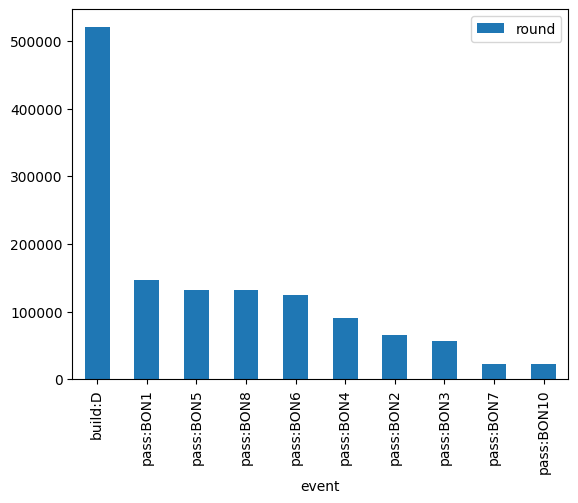

In [ ]:
# 0라운드
## 0라운드 데이터에서 이벤트 별로 그룹 바이
df_game_events_0_GB = pd.DataFrame(df_game_events_0.groupby('event').count())
df_game_events_0_GB.reset_index(drop = False, inplace = True)

## 정렬
df_game_events_0_GB_top10 = df_game_events_0_GB.sort_values("round", ascending=False).head(10)
## 컬럼 선택
df_game_events_0_top10 = df_game_events_0_GB_top10[['event','round']]
## 인덱스를 event로 새로 설정
df_game_events_0_top10.set_index('event', inplace=True)
## 막대그래프
df_game_events_0_top10.plot.bar()

#### 2.3.2) 1 라운드

In [ ]:
# 1. event 별로 그룹화해서 count
# 2.
df_game_events_1

,Unnamed: 0,event,faction,game,num,round,turn
0,3,order:1,halflings,0000000001,1,1,1
1,11,vp,halflings,0000000001,4,1,1
2,12,vp,halflings,0000000001,3,1,4
3,22,upgrade:TP,halflings,0000000001,1,1,1
4,23,upgrade:TP,halflings,0000000001,1,1,4
...,...,...,...,...,...,...,...
12051024,73419050,upgrade:TE,darklings,ZeicheMasZeuchnis,1,1,3
12051025,73419052,favor:any,darklings,ZeicheMasZeuchnis,1,1,3
12051026,73419061,build:D,darklings,ZeicheMasZeuchnis,1,1,4
12051027,73419069,burn,darklings,ZeicheMasZeuchnis,4,1,1


<Axes: xlabel='event'>

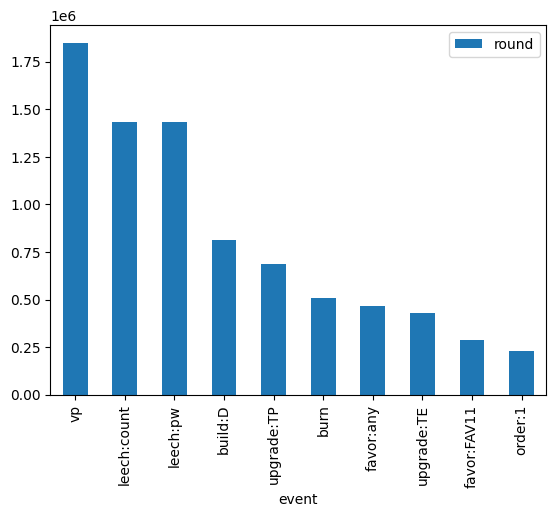

In [ ]:
# 1라운드
## 1라운드 데이터에서 이벤트 별로 그룹 바이
df_game_events_1_GB = pd.DataFrame(df_game_events_1.groupby('event').count())
df_game_events_1_GB.reset_index(drop = False, inplace = True)

## 정렬
df_game_events_1_GB_top10 = df_game_events_1_GB.sort_values("round", ascending=False).head(10)
## 컬럼 선택
df_game_events_1_top10 = df_game_events_1_GB_top10[['event','round']]
## 인덱스를 event로 새로 설정
df_game_events_1_top10.set_index('event', inplace=True)
## 막대그래프
df_game_events_1_top10.plot.bar()

#### 2.3.3) 2 라운드

<Axes: xlabel='event'>

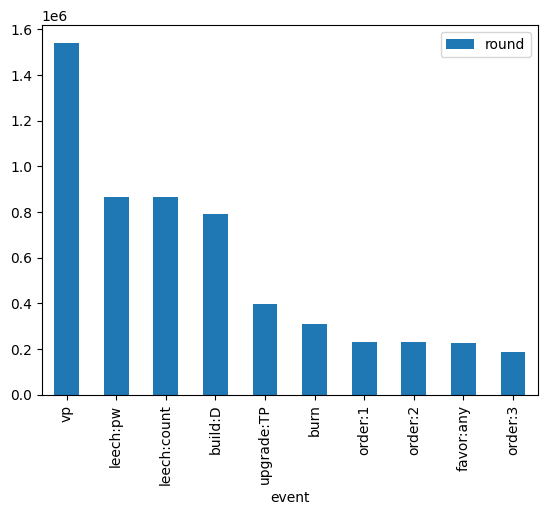

In [ ]:
# 2라운드
## 2라운드 데이터에서 이벤트 별로 그룹 바이
df_game_events_2_GB = pd.DataFrame(df_game_events_2.groupby('event').count())
df_game_events_2_GB.reset_index(drop = False, inplace = True)

## 정렬
df_game_events_2_GB_top10 = df_game_events_2_GB.sort_values("round", ascending=False).head(10)
## 컬럼 선택
df_game_events_2_top10 = df_game_events_2_GB_top10[['event','round']]
## 인덱스를 event로 새로 설정
df_game_events_2_top10.set_index('event', inplace=True)
## 막대그래프
df_game_events_2_top10.plot.bar()

#### 2.3.4) 3 라운드

<Axes: xlabel='event'>

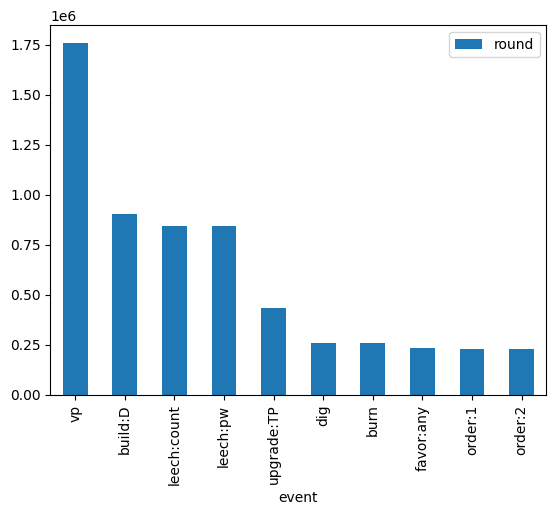

In [ ]:
# 3라운드
## 3라운드 데이터에서 이벤트 별로 그룹 바이
df_game_events_3_GB = pd.DataFrame(df_game_events_3.groupby('event').count())
df_game_events_3_GB.reset_index(drop = False, inplace = True)

## 정렬
df_game_events_3_GB_top10 = df_game_events_3_GB.sort_values("round", ascending=False).head(10)
## 컬럼 선택
df_game_events_3_top10 = df_game_events_3_GB_top10[['event','round']]
## 인덱스를 event로 새로 설정
df_game_events_3_top10.set_index('event', inplace=True)
## 막대그래프
df_game_events_3_top10.plot.bar()

#### 2.3.5) 4 라운드

<Axes: xlabel='event'>

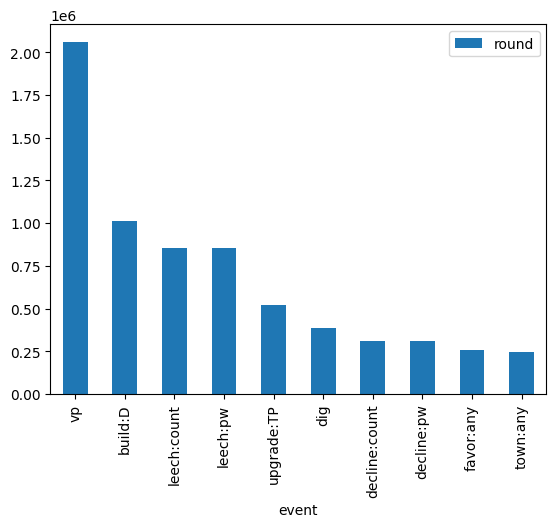

In [ ]:
# 4라운드
## 4라운드 데이터에서 이벤트 별로 그룹 바이
df_game_events_4_GB = pd.DataFrame(df_game_events_4.groupby('event').count())
df_game_events_4_GB.reset_index(drop = False, inplace = True)

## 정렬
df_game_events_4_GB_top10 = df_game_events_4_GB.sort_values("round", ascending=False).head(10)
## 컬럼 선택
df_game_events_4_top10 = df_game_events_4_GB_top10[['event','round']]
## 인덱스를 event로 새로 설정
df_game_events_4_top10.set_index('event', inplace=True)
## 막대그래프
df_game_events_4_top10.plot.bar()

#### 2.3.6) 5 라운드

<Axes: xlabel='event'>

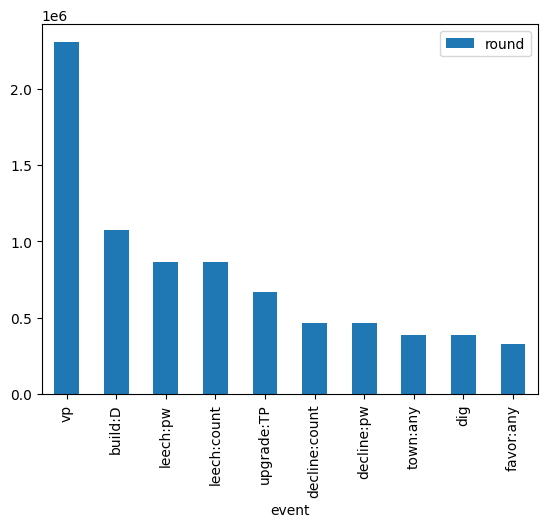

In [ ]:
# 5라운드
## 5라운드 데이터에서 이벤트 별로 그룹 바이
df_game_events_5_GB = pd.DataFrame(df_game_events_5.groupby('event').count())
df_game_events_5_GB.reset_index(drop = False, inplace = True)

## 정렬
df_game_events_5_GB_top10 = df_game_events_5_GB.sort_values("round", ascending=False).head(10)
## 컬럼 선택
df_game_events_5_top10 = df_game_events_5_GB_top10[['event','round']]
## 인덱스를 event로 새로 설정
df_game_events_5_top10.set_index('event', inplace=True)
## 막대그래프
df_game_events_5_top10.plot.bar()

#### 2.3.7) 6 라운드

<Axes: xlabel='event'>

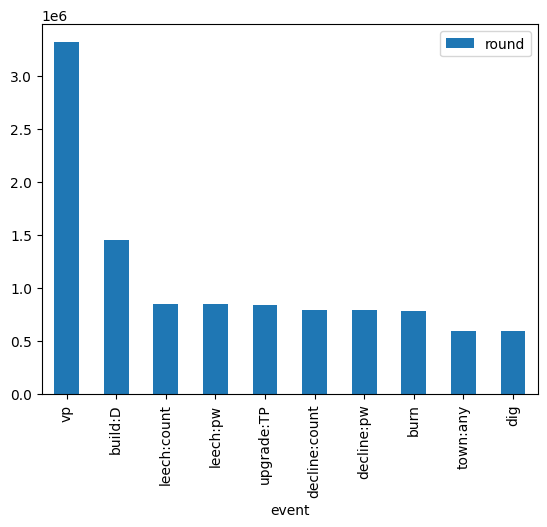

In [ ]:
# 6라운드
## 6라운드 데이터에서 이벤트 별로 그룹 바이
df_game_events_6_GB = pd.DataFrame(df_game_events_6.groupby('event').count())
df_game_events_6_GB.reset_index(drop = False, inplace = True)

## 정렬
df_game_events_6_GB_top10 = df_game_events_6_GB.sort_values("round", ascending=False).head(10)
## 컬럼 선택
df_game_events_6_top10 = df_game_events_6_GB_top10[['event','round']]
## 인덱스를 event로 새로 설정
df_game_events_6_top10.set_index('event', inplace=True)
## 막대그래프
df_game_events_6_top10.plot.bar()

## 주제 3. 플레이어들 중 고득점을 한 플레이어들의 특징이 무엇일까요?
- 고득점 플레이어의 기준은 무엇일까요?
 - 상위 기준은 10%일까요? 15%일까요? 그렇다면 왜 그런 기준을 선정할 수 있을까요?

### 3.1) df_ratings_players 데이터를 활용해서 상위권 플레이어를 구해보자

#### 3.1.1) 데이터 확인

In [ ]:
df_ratings_players

,games,score,username
0,17,929.531476,jlub
1,35,1301.412078,Cephalofair
2,25,913.964542,rexhorhor
3,5,1011.691234,Sebl
4,552,1381.147196,csander1
...,...,...,...
5679,54,1185.553695,AM631
5680,264,1080.940230,diarma
5681,34,827.604833,Soccerman99
5682,26,984.350071,Mattashaver


In [ ]:
# 결측값 확인
df_ratings_players.isnull().sum()

games       0
score       0
username    0
dtype: int64

In [ ]:
# 상관계수 계산해보기
## 게임 플레이 횟수가 높을수록 스코어가 높아지는가를 확인하기 위해서
d_corr = df_ratings_players.corr()

<ipython-input-18-489d83f86382>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d_corr = df_ratings_players.corr()


In [ ]:
d_corr

,games,score
games,1.000000,0.329628
score,0.329628,1.000000


- 상관계수가 0.2~0.4 수준이기에 게임 플레이 횟수와 점수는 상관관계가 없다고 판단할 수 있음

In [ ]:
"""plt.figure(figsize=(20,7))
sns.heatmap(d_corr, annot=True, fmt=".2f", cmap="Blues")"""

'plt.figure(figsize=(20,7))\nsns.heatmap(d_corr, annot=True, fmt=".2f", cmap="Blues")'

---
#### 3.1.1 IQR 활용해서 이상값 확인 (생략)
---



In [ ]:
"""q3 = df_ratings_players.quantile(0.75) # df_ratings_players['score'].quantile(0.75) 처럼 특정 열만 적용 가능
q1 = df_ratings_players.quantile(0.25)
iqr = q3 - q1"""

"q3 = df_ratings_players.quantile(0.75) # df_ratings_players['score'].quantile(0.75) 처럼 특정 열만 적용 가능\nq1 = df_ratings_players.quantile(0.25)\niqr = q3 - q1"

In [ ]:
"""q1"""

'q1'

In [ ]:
""" q1['games'] - 1.5 * iqr['games']"""

" q1['games'] - 1.5 * iqr['games']"

In [ ]:
"""# games 기준으로 이상값 판별하기
## 많이 플레이한 사람은 이상값으로 판별할 필요 없지만, 너무 적게 플레이한 사람은 이상값으로 판별할 필요가 있음
## 아래 이상값 판별하기위한 함수에서 너무 적게 한 사람 우선 제거

# 이상값 제거 함수
def is_games_outlier(df):
    games = df['games']
    if games < q1['games'] - 1.5 * iqr['games']:
        return True
    else:
        return False

# games 값의 이상치 여부를 T,F로 확인하여 outlier_TF라는 새로운 열에 저장
df_ratings_players['outlier_TF'] = df_ratings_players.apply(is_games_outlier, axis = 1) # axis = 1 지정 필수
df_ratings_players"""

"# games 기준으로 이상값 판별하기\n## 많이 플레이한 사람은 이상값으로 판별할 필요 없지만, 너무 적게 플레이한 사람은 이상값으로 판별할 필요가 있음\n## 아래 이상값 판별하기위한 함수에서 너무 적게 한 사람 우선 제거\n\n# 이상값 제거 함수\ndef is_games_outlier(df):\n    games = df['games']\n    if games < q1['games'] - 1.5 * iqr['games']:\n        return True\n    else:\n        return False\n\n# games 값의 이상치 여부를 T,F로 확인하여 outlier_TF라는 새로운 열에 저장\ndf_ratings_players['outlier_TF'] = df_ratings_players.apply(is_games_outlier, axis = 1) # axis = 1 지정 필수\ndf_ratings_players"

In [ ]:
"""# 이상치인 행은 제거하여 필터링
df_trim = df_ratings_players.loc[df_ratings_players['outlier_TF'] == False]

# 이상치여부를 나타내는 열 제거
del df_trim['outlier_TF']

df_trim"""

"# 이상치인 행은 제거하여 필터링\ndf_trim = df_ratings_players.loc[df_ratings_players['outlier_TF'] == False]\n\n# 이상치여부를 나타내는 열 제거\ndel df_trim['outlier_TF']\n\ndf_trim"

#### 3.1.2) 상위 플레이어 선정

##### 3.1.2.1) 상위 플레이어 선정하기 위해서 정렬

In [ ]:
# score로 정렬
d = df_ratings_players.sort_values('score', ascending = False)

In [ ]:
d

,games,score,username
3104,61,1611.027856,ttchong
4163,334,1602.742979,Xevoc
814,76,1517.028626,sam20011336
4676,117,1513.797140,Greenraingw
2304,37,1508.498233,enkidu
...,...,...,...
2605,155,527.377103,Berci27
4687,90,526.940977,Maia8
833,53,523.155582,Jazzday
2794,96,476.784676,Danna


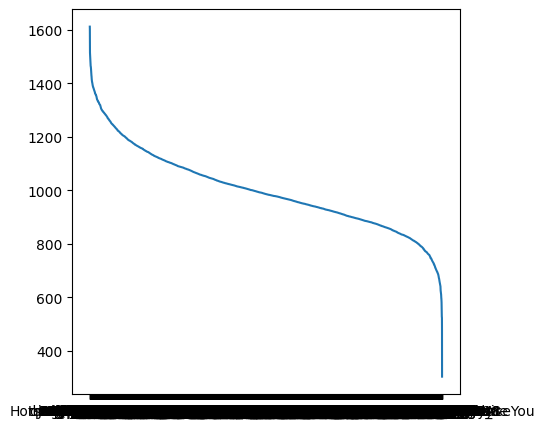

In [ ]:
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
ax.plot(d['username'],d['score']) ## 선그래프 생성
plt.show()

##### 3.1.2.2) 상위 플레이어 선정하는 기준 (클러스터링)
- 상위 그룹을 선정해보기 위해서 k-means 클러스터링을 활용해보자

In [ ]:
# pip install matplotlib --force-reinstall --user

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-30-8bb6fe9305e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score["clusters"] = kmeans.labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-30-8bb6fe9305e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

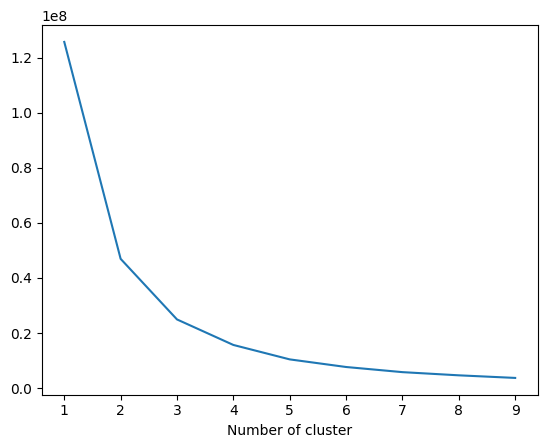

In [ ]:
sse={} # error
score = d[['score']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(score)
    score["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

- elbow 방법을 활용해서 k 값을 4로 지정하고 상위 그룹을 선정하자

In [ ]:
d

,games,score,username
3104,61,1611.027856,ttchong
4163,334,1602.742979,Xevoc
814,76,1517.028626,sam20011336
4676,117,1513.797140,Greenraingw
2304,37,1508.498233,enkidu
...,...,...,...
2605,155,527.377103,Berci27
4687,90,526.940977,Maia8
833,53,523.155582,Jazzday
2794,96,476.784676,Danna


In [ ]:
kmeans = KMeans(n_clusters = 4)
d['score_cluster'] = kmeans.fit_predict(d[['score']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
d

,games,score,username,score_cluster
3104,61,1611.027856,ttchong,3
4163,334,1602.742979,Xevoc,3
814,76,1517.028626,sam20011336,3
4676,117,1513.797140,Greenraingw,3
2304,37,1508.498233,enkidu,3
...,...,...,...,...
2605,155,527.377103,Berci27,0
4687,90,526.940977,Maia8,0
833,53,523.155582,Jazzday,0
2794,96,476.784676,Danna,0


- 무작위로 매겨진 클러스터링 값 정렬 후 재배열

In [ ]:
# 클러스터링 값 정렬
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_n = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_n = df_n.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_n['index'] = df_n.index
    df_final = pd.merge(df,df_n[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_new = order_cluster('score_cluster', 'score', d, False)
df_new

,games,score,username,score_cluster
0,61,1611.027856,ttchong,0
1,334,1602.742979,Xevoc,0
2,76,1517.028626,sam20011336,0
3,117,1513.797140,Greenraingw,0
4,37,1508.498233,enkidu,0
...,...,...,...,...
5679,155,527.377103,Berci27,3
5680,90,526.940977,Maia8,3
5681,53,523.155582,Jazzday,3
5682,96,476.784676,Danna,3


In [ ]:
df_new.groupby('score_cluster')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
score_cluster,,,,,,,,
0,604.0,1281.797346,72.362027,1193.162199,1222.609279,1266.467455,1324.980944,1611.027856
1,1487.0,1102.625511,44.006318,1033.479377,1064.330389,1097.922585,1137.519566,1192.724357
2,2283.0,963.058221,40.467208,891.150806,928.360628,964.724759,997.513972,1033.250108
3,1310.0,817.960572,66.950887,304.494408,788.833056,835.182162,867.423356,890.923893


- k-means 클러스터링 결과 상위 플레이어는 총 604명으로 진행해볼 수 있다.

##### 3.1.2.3) 상위 604명 그룹 필터링

In [ ]:
df_top_score = df_new.head(604)

In [ ]:
df_top_score

,games,score,username,score_cluster
0,61,1611.027856,ttchong,0
1,334,1602.742979,Xevoc,0
2,76,1517.028626,sam20011336,0
3,117,1513.797140,Greenraingw,0
4,37,1508.498233,enkidu,0
...,...,...,...,...
599,87,1193.675225,r,0
600,20,1193.480113,kaitie,0
601,128,1193.317037,Ashoran,0
602,179,1193.197652,chuchu21,0


### 3.2) df_ratings_player_factions 데이터 활용

In [ ]:
df_ratings_player_factions

,count,faction,score,username
0,1,nomads,-10.684745,jlub
1,1,dragonlords,17.110632,jlub
2,1,auren,-7.954213,jlub
3,3,halflings,4.988431,jlub
4,2,engineers,-30.141629,jlub
...,...,...,...,...
61770,11,giants,59.438034,sebulba128
61771,15,darklings,90.365190,sebulba128
61772,3,swarmlings,10.778526,sebulba128
61773,19,witches,-26.104562,sebulba128


In [ ]:
# 상위 그룹에 속하는 데이터만 필터링
## 상위 그룹 리스트 지정
target = df_top_score['username']

In [ ]:
# df_ratings_player_factions에서 target에 속하는 이름만 필터링
df_top_ratings_player_factions = df_ratings_player_factions.loc[df_ratings_player_factions['username'].isin(target)]

In [ ]:
# 상위 그룹 필터링 데이터
df_top_ratings_player_factions

,count,faction,score,username
12,2,giants,9.026678,Cephalofair
13,3,darklings,-3.205254,Cephalofair
14,3,alchemists,29.738708,Cephalofair
15,4,swarmlings,52.813417,Cephalofair
16,4,witches,71.147104,Cephalofair
...,...,...,...,...
61702,1,chaosmagicians,-32.634985,Zauberer
61703,1,cultists,24.317515,Zauberer
61704,1,halflings,10.732436,Zauberer
61705,6,engineers,135.224630,Zauberer


### 3.3) df_stats 데이터 활용

#### 3.3.1) 데이터 확인

In [ ]:
df_stats

,average_margin,average_position,average_vp,average_winner_vp,count,expected_wins,faction,final_scoring,high_score_game,high_score_player,high_score_time,high_score_vp,map,min_rating,player_count,start_position,wins
0,57.000000,4,309,337,2,0.666667,alchemists,expansion,Wargames52,BravePawn,2017-03-30 19:36:16,189,be8f6ebf549404d015547152d5f2a1906ae8dd90,0,3,middle,1.000000
1,28.666667,2,145,155,1,0.250000,darklings,expansion,gareth45,Lachlan,2014-05-12 12:12:43,145,30b6ded823e53670624981abdb2c5b8568a44091,0,4,last,0.000000
2,-36.500000,50,2978,3498,25,8.333333,mermaids,original,4pLeague_S8_D6L5_G7,koralgol,2015-09-12 09:41:11,159,126fe960806d587c78546b30f1a90853b1ada468,0,3,first,8.333333
3,9.000000,10,466,511,4,1.000000,darklings,original,TourRulesFeI02,vanmorrison,2017-03-20 19:41:33,124,be8f6ebf549404d015547152d5f2a1906ae8dd90,0,4,second,1.000000
4,-14.000000,2,135,149,1,0.500000,giants,expansion,CEE008,Favela,2017-10-15 21:28:54,135,fdb13a13cd48b7a3c3525f27e4628ff6905aa5b1,0,2,last,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74372,32.500000,1,122,122,1,0.200000,swarmlings,original,Marcus3,LoquaciousMonk,2017-09-26 05:17:20,122,95a66999127893f5925a5f591d54f8bcb9a670e6,0,5,second,1.000000
74373,2.750000,2,113,131,1,0.200000,nomads,expansion,Halmstad8TerraM8Elit,Master-Articy,2016-05-07 09:51:30,113,be8f6ebf549404d015547152d5f2a1906ae8dd90,0,5,second-to-last,0.000000
74374,-92.000000,9,705,805,5,2.500000,chaosmagicians,expansion,4311,roro,2018-02-05 15:48:20,158,95a66999127893f5925a5f591d54f8bcb9a670e6,0,2,first,1.000000
74375,-34.000000,6,606,673,4,2.000000,engineers,expansion,Seriousduel18,Tim.T,2015-10-17 23:43:16,177,be8f6ebf549404d015547152d5f2a1906ae8dd90,0,2,last,2.000000


In [ ]:
# 결측값 확인
df_stats.isnull().sum()

average_margin       0
average_position     0
average_vp           0
average_winner_vp    0
count                0
expected_wins        0
faction              0
final_scoring        0
high_score_game      0
high_score_player    0
high_score_time      0
high_score_vp        0
map                  0
min_rating           0
player_count         0
start_position       0
wins                 0
dtype: int64

In [ ]:
# 결측값 제거
df_stats.dropna(axis=0, inplace=True)

In [ ]:
# df_stats target에 속하는 이름만 필터링
df_top_stats = df_stats.loc[df_stats['high_score_player'].isin(target)]

In [ ]:
df_top_stats

,average_margin,average_position,average_vp,average_winner_vp,count,expected_wins,faction,final_scoring,high_score_game,high_score_player,high_score_time,high_score_vp,map,min_rating,player_count,start_position,wins
0,57.000000,4,309,337,2,0.666667,alchemists,expansion,Wargames52,BravePawn,2017-03-30 19:36:16,189,be8f6ebf549404d015547152d5f2a1906ae8dd90,0,3,middle,1.0
7,-62.333333,7,215,330,2,0.500000,giants,expansion,FastEUGame6c,rafalimaz,2017-11-18 17:51:21,119,95a66999127893f5925a5f591d54f8bcb9a670e6,1250,4,last,0.0
8,3.000000,2,133,162,1,0.250000,halflings,expansion,Biddingsystempls02,kahy,2018-02-06 22:00:39,133,fdb13a13cd48b7a3c3525f27e4628ff6905aa5b1,1000,4,first,0.0
10,78.000000,38,2435,2799,19,6.333333,engineers,original,BarDownTM12,AlanWu,2016-07-07 00:27:09,166,126fe960806d587c78546b30f1a90853b1ada468,0,3,first,5.0
11,-15.250000,5,108,139,1,0.200000,chaosmagicians,original,Ge72,Keirel,2017-04-26 01:34:13,108,126fe960806d587c78546b30f1a90853b1ada468,1000,5,middle,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74356,59.000000,2,163,168,1,0.250000,fakirs,expansion,0705July,lizzy,2016-07-27 12:00:35,163,be8f6ebf549404d015547152d5f2a1906ae8dd90,0,4,last,0.0
74367,-7.666667,3,128,160,1,0.250000,halflings,original,CTK401,UOP_Champ,2016-06-07 05:04:17,128,126fe960806d587c78546b30f1a90853b1ada468,1250,4,first,0.0
74368,40.000000,7,625,663,4,1.333333,swarmlings,expansion,RigelSectorP3G127,koishi,2015-11-16 15:39:07,187,95a66999127893f5925a5f591d54f8bcb9a670e6,1000,3,first,2.0
74369,36.500000,1,181,181,1,0.333333,fakirs,expansion,Stefan49,Jan,2017-05-07 21:08:06,181,95a66999127893f5925a5f591d54f8bcb9a670e6,1000,3,first,1.0


- 시각화 목록
 1. map,	final_scoring,	faction,	expected_wins,	high_score_player,	high_score_vp,	average_vp,	average_winner_vp,	player_count,	start_position,	wins
 2. average_margin, average_position, count,	high_score_game,	high_score_time,	min_rating,

#### 3.3.2) map 시각화 (파이차트)

In [ ]:
# 맵 별로 플레이 된 횟수를 파악해보기
df_top_stats_GB = pd.DataFrame(df_top_stats.groupby('map').count())
df_top_stats_GB.reset_index(drop = False, inplace = True)

In [ ]:
df_top_stats_GB

,map,average_margin,average_position,average_vp,average_winner_vp,count,expected_wins,faction,final_scoring,high_score_game,high_score_player,high_score_time,high_score_vp,min_rating,player_count,start_position,wins
0,126fe960806d587c78546b30f1a90853b1ada468,11041,11041,11041,11041,11041,11041,11041,11041,11041,11041,11041,11041,11041,11041,11041,11041
1,224736500d20520f195970eb0fd4c41df040c08c,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,30b6ded823e53670624981abdb2c5b8568a44091,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,735b073fd7161268bb2796c1275abda92acd8b1a,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,91645cdb135773c2a7a50e5ca9cb18af54c664c4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
5,95a66999127893f5925a5f591d54f8bcb9a670e6,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770
6,be8f6ebf549404d015547152d5f2a1906ae8dd90,6031,6031,6031,6031,6031,6031,6031,6031,6031,6031,6031,6031,6031,6031,6031,6031
7,c07f36f9e050992d2daf6d44af2bc51dca719c46,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,fdb13a13cd48b7a3c3525f27e4628ff6905aa5b1,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921


- 플레이 수가 매우 적은 맵 5개 제외후 시각화

In [ ]:
# 플레이수가 적은 맵 제외하기
# 5개 맵 제외
df_top_stats_GB_new = df_top_stats.drop(df_top_stats[df_top_stats['map'] == "224736500d20520f195970eb0fd4c41df040c08c"].index)
df_top_stats_GB_new = df_top_stats_GB_new.drop(df_top_stats_GB_new[df_top_stats_GB_new['map'] == "30b6ded823e53670624981abdb2c5b8568a44091"].index)
df_top_stats_GB_new = df_top_stats_GB_new.drop(df_top_stats_GB_new[df_top_stats_GB_new['map'] == "735b073fd7161268bb2796c1275abda92acd8b1a"].index)
df_top_stats_GB_new = df_top_stats_GB_new.drop(df_top_stats_GB_new[df_top_stats_GB_new['map'] == "91645cdb135773c2a7a50e5ca9cb18af54c664c4"].index)
df_top_stats_GB_new = df_top_stats_GB_new.drop(df_top_stats_GB_new[df_top_stats_GB_new['map'] == "c07f36f9e050992d2daf6d44af2bc51dca719c46"].index)

In [ ]:
df_top_stats_GB_new

,average_margin,average_position,average_vp,average_winner_vp,count,expected_wins,faction,final_scoring,high_score_game,high_score_player,high_score_time,high_score_vp,map,min_rating,player_count,start_position,wins
0,57.000000,4,309,337,2,0.666667,alchemists,expansion,Wargames52,BravePawn,2017-03-30 19:36:16,189,be8f6ebf549404d015547152d5f2a1906ae8dd90,0,3,middle,1.0
7,-62.333333,7,215,330,2,0.500000,giants,expansion,FastEUGame6c,rafalimaz,2017-11-18 17:51:21,119,95a66999127893f5925a5f591d54f8bcb9a670e6,1250,4,last,0.0
8,3.000000,2,133,162,1,0.250000,halflings,expansion,Biddingsystempls02,kahy,2018-02-06 22:00:39,133,fdb13a13cd48b7a3c3525f27e4628ff6905aa5b1,1000,4,first,0.0
10,78.000000,38,2435,2799,19,6.333333,engineers,original,BarDownTM12,AlanWu,2016-07-07 00:27:09,166,126fe960806d587c78546b30f1a90853b1ada468,0,3,first,5.0
11,-15.250000,5,108,139,1,0.200000,chaosmagicians,original,Ge72,Keirel,2017-04-26 01:34:13,108,126fe960806d587c78546b30f1a90853b1ada468,1000,5,middle,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74356,59.000000,2,163,168,1,0.250000,fakirs,expansion,0705July,lizzy,2016-07-27 12:00:35,163,be8f6ebf549404d015547152d5f2a1906ae8dd90,0,4,last,0.0
74367,-7.666667,3,128,160,1,0.250000,halflings,original,CTK401,UOP_Champ,2016-06-07 05:04:17,128,126fe960806d587c78546b30f1a90853b1ada468,1250,4,first,0.0
74368,40.000000,7,625,663,4,1.333333,swarmlings,expansion,RigelSectorP3G127,koishi,2015-11-16 15:39:07,187,95a66999127893f5925a5f591d54f8bcb9a670e6,1000,3,first,2.0
74369,36.500000,1,181,181,1,0.333333,fakirs,expansion,Stefan49,Jan,2017-05-07 21:08:06,181,95a66999127893f5925a5f591d54f8bcb9a670e6,1000,3,first,1.0


In [ ]:
# 맵 별 플레이 횟수
df_top_stats_GB = pd.DataFrame(df_top_stats_GB_new.groupby('map').count())
df_top_stats_GB.reset_index(drop = False, inplace = True)
df_top_stats_GB

,map,average_margin,average_position,average_vp,average_winner_vp,count,expected_wins,faction,final_scoring,high_score_game,high_score_player,high_score_time,high_score_vp,min_rating,player_count,start_position,wins
0,126fe960806d587c78546b30f1a90853b1ada468,11041,11041,11041,11041,11041,11041,11041,11041,11041,11041,11041,11041,11041,11041,11041,11041
1,95a66999127893f5925a5f591d54f8bcb9a670e6,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770
2,be8f6ebf549404d015547152d5f2a1906ae8dd90,6031,6031,6031,6031,6031,6031,6031,6031,6031,6031,6031,6031,6031,6031,6031,6031
3,fdb13a13cd48b7a3c3525f27e4628ff6905aa5b1,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921


([<matplotlib.patches.Wedge at 0x78afcf463310>,
 [Text(0.24481036436512899, 1.072412180786573, '126fe960806d587c78546b30f1a90853b1ada468'),
  Text(-0.9660671415625188, -0.5260363846667117, '95a66999127893f5925a5f591d54f8bcb9a670e6'),
  Text(0.6308272379136596, -0.9011420509033098, 'be8f6ebf549404d015547152d5f2a1906ae8dd90'),
  Text(1.0930700144903078, -0.12327993925273614, 'fdb13a13cd48b7a3c3525f27e4628ff6905aa5b1')],
 [Text(0.13353292601734307, 0.5849520986108578, '42.9%'),
  Text(-0.5269457135795557, -0.2869289370909336, '30.2%'),
  Text(0.3440875843165415, -0.49153202776544164, '23.4%'),
  Text(0.5962200079038042, -0.06724360322876516, '3.6%')])

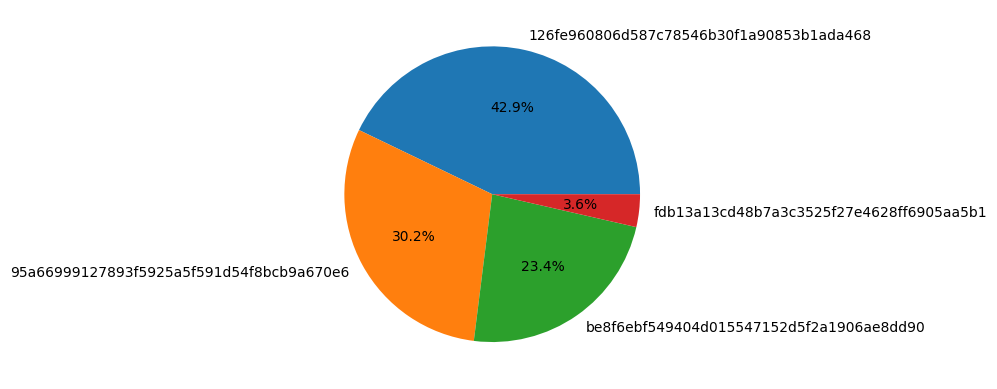

In [ ]:
plt.pie(df_top_stats_GB['count'], labels = df_top_stats_GB['map'], autopct='%1.1f%%')

#### 3.3.3) final_scoring 시각화

In [ ]:
# final scoring 별 플레이 횟수
df_top_stats_GB = pd.DataFrame(df_top_stats_GB_new.groupby('final_scoring').count())
df_top_stats_GB.reset_index(drop = False, inplace = True)
df_top_stats_GB

,final_scoring,average_margin,average_position,average_vp,average_winner_vp,count,expected_wins,faction,high_score_game,high_score_player,high_score_time,high_score_vp,map,min_rating,player_count,start_position,wins
0,expansion,15183,15183,15183,15183,15183,15183,15183,15183,15183,15183,15183,15183,15183,15183,15183,15183
1,original,10580,10580,10580,10580,10580,10580,10580,10580,10580,10580,10580,10580,10580,10580,10580,10580


([<matplotlib.patches.Wedge at 0x78afcf3778b0>,
 [Text(-0.30467785446660905, 1.056963294063528, 'expansion'),
  Text(0.30467785446660917, -1.0569632940635278, 'original')],
 [Text(-0.16618792061815038, 0.5765254331255607, '58.9%'),
  Text(0.16618792061815044, -0.5765254331255606, '41.1%')])

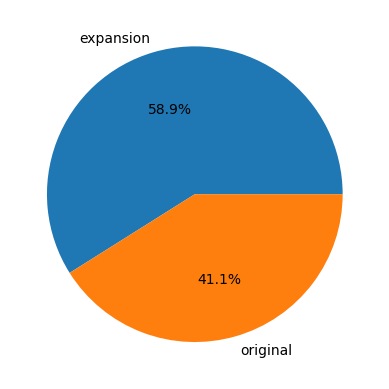

In [ ]:
plt.pie(df_top_stats_GB['count'], labels = df_top_stats_GB['final_scoring'], autopct='%1.1f%%')

- 상위 플레이어들의 final scoring 분포

#### 3.3.4) faction 시각화

In [ ]:
# faction 별 플레이 횟수
df_top_stats_GB = pd.DataFrame(df_top_stats_GB_new.groupby('faction').count())
df_top_stats_GB.reset_index(drop = False, inplace = True)
df_top_stats_GB

,faction,average_margin,average_position,average_vp,average_winner_vp,count,expected_wins,final_scoring,high_score_game,high_score_player,high_score_time,high_score_vp,map,min_rating,player_count,start_position,wins
0,acolytes,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758
1,alchemists,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483
2,auren,860,860,860,860,860,860,860,860,860,860,860,860,860,860,860,860
3,chaosmagicians,1665,1665,1665,1665,1665,1665,1665,1665,1665,1665,1665,1665,1665,1665,1665,1665
4,cultists,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455
5,darklings,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876
6,dragonlords,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935,935
7,dwarves,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186
8,engineers,1623,1623,1623,1623,1623,1623,1623,1623,1623,1623,1623,1623,1623,1623,1623,1623
9,fakirs,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038


([<matplotlib.patches.Wedge at 0x78afd02d4be0>,
 [Text(1.0953043172749075, 0.10153054988006682, 'acolytes'),
  Text(1.027259398723436, 0.3933676749993124, 'alchemists'),
  Text(0.874749768458874, 0.6669429080372221, 'auren'),
  Text(0.6314864178760052, 0.9006802451692452, 'chaosmagicians'),
  Text(0.2518667437116369, 1.0707768877838637, 'cultists'),
  Text(-0.19170279878795976, 1.0831666708945873, 'darklings'),
  Text(-0.5446089167312864, 0.9557202141928227, 'dragonlords'),
  Text(-0.7709345360133085, 0.7846400073804196, 'dwarves'),
  Text(-0.9896898043065335, 0.4801188303448383, 'engineers'),
  Text(-1.0911150918085681, 0.13952726051772077, 'fakirs'),
  Text(-1.0866901452792221, -0.17060049282761003, 'giants'),
  Text(-0.9747821195051023, -0.5097056204253008, 'halflings'),
  Text(-0.7888118847678462, -0.7666653836250846, 'icemaidens'),
  Text(-0.47897203153949663, -0.9902453196066759, 'mermaids'),
  Text(0.02139332829937689, -1.0997919464627277, 'nomads'),
  Text(0.3566117668250759, -

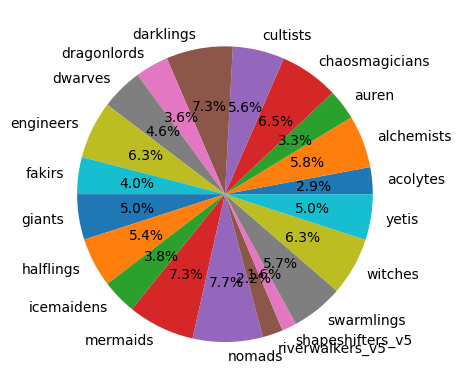

In [ ]:
plt.pie(df_top_stats_GB['count'], labels = df_top_stats_GB['faction'], autopct='%1.1f%%')

- 상위 플레이어들의 faction 분포

#### 3.3.5) start_position 시각화

In [ ]:
# faction 별 플레이 횟수
df_top_stats_GB = pd.DataFrame(df_top_stats_GB_new.groupby('start_position').count())
df_top_stats_GB.reset_index(drop = False, inplace = True)
df_top_stats_GB

,start_position,average_margin,average_position,average_vp,average_winner_vp,count,expected_wins,faction,final_scoring,high_score_game,high_score_player,high_score_time,high_score_vp,map,min_rating,player_count,wins
0,first,7160,7160,7160,7160,7160,7160,7160,7160,7160,7160,7160,7160,7160,7160,7160,7160
1,last,7310,7310,7310,7310,7310,7310,7310,7310,7310,7310,7310,7310,7310,7310,7310,7310
2,middle,2970,2970,2970,2970,2970,2970,2970,2970,2970,2970,2970,2970,2970,2970,2970,2970
3,second,4139,4139,4139,4139,4139,4139,4139,4139,4139,4139,4139,4139,4139,4139,4139,4139
4,second-to-last,4184,4184,4184,4184,4184,4184,4184,4184,4184,4184,4184,4184,4184,4184,4184,4184


([<matplotlib.patches.Wedge at 0x78afd06b2e00>,
 [Text(0.706695226292284, 0.8429601752963765, 'first'),
  Text(-0.9632308674937203, 0.5312121006785286, 'last'),
  Text(-0.8051742807572602, -0.749462725962425, 'middle'),
  Text(0.05021661548198159, -1.0988531710513172, 'second'),
  Text(0.9599086196294053, -0.5371921834512952, 'second-to-last')],
 [Text(0.38547012343215487, 0.4597964592525689, '27.8%'),
  Text(-0.5253986549965747, 0.28975205491556105, '28.4%'),
  Text(-0.4391859713221419, -0.40879785052495904, '11.5%'),
  Text(0.027390881171989956, -0.599374456937082, '16.1%'),
  Text(0.5235865197978574, -0.29301391824616096, '16.2%')])

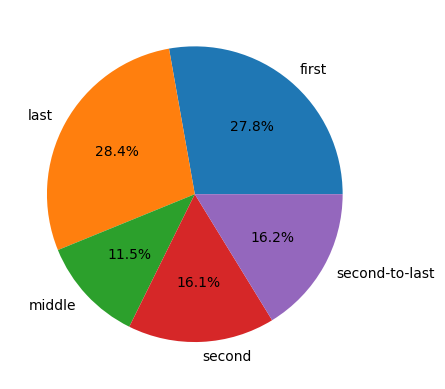

In [ ]:
plt.pie(df_top_stats_GB['count'], labels = df_top_stats_GB['start_position'], autopct='%1.1f%%')

### 심화 주제
- 지금까지 상위 플레이어들의 특징을 살펴보았습니다. 그렇다면 상위 플레이어가 아닌 그룹의 특징은 어떨까요? 상위 그룹과 어떤 차이가 있을까요? 지금까지 배운 내용을 자유롭게 활용해서 시각화를 해보세요.